

---

# Загрузка данных

---


In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mohamedbakhet/amazon-books-reviews

Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
License(s): CC0-1.0
100% 1.06G/1.06G [00:09<00:00, 123MB/s]
100% 1.06G/1.06G [00:09<00:00, 117MB/s]


In [ ]:
!unzip "/content/amazon-books-reviews.zip" -d "/content/drive/MyDrive/Book_recsys/data"

Archive:  /content/amazon-books-reviews.zip
  inflating: /content/drive/MyDrive/Book_recsys/data/Books_rating.csv  
  inflating: /content/drive/MyDrive/Book_recsys/data/books_data.csv  


In [ ]:
import pandas as pd

In [ ]:
books_ratings = pd.read_csv("/content/drive/MyDrive/Book_recsys/data/Books_rating.csv")
books_info = pd.read_csv("/content/drive/MyDrive/Book_recsys/data/books_data.csv")

In [ ]:
print("Отзывы книг:")
print(books_ratings.info())

print("\nДанные по книгам:")
print(books_ratings.info())

Отзывы книг:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
None

Данные по книгам:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/s


---

# Подготовка и очистка данных

---



In [ ]:
print("Пропуски в датасете с отзывами")
print(books_ratings.isna().sum())

print("\nПропуски в датасете с данными по книгам")
print(books_info.isna().sum())

Пропуски в датасете с отзывами
Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

Пропуски в датасете с данными по книгам
Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64


## Работа с пропусками


### Очистка датасета с отзывами




---



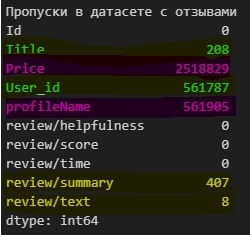

  <div style="line-height: 1.8;">
    <span style="color: #6cb44f;">Удалим строки с пропусками в важных колонках - Title и User_id.</span><br>
    <span style="color: #e9269a;">Удалим полностью ненужные колонки - profileName и Price.</span><br>
    <span style="color: #c2c550;">Заполним пропуски в колонках - review/summary и review/text пустыми строками ''</span>
  </div>

---

In [ ]:
books_ratings=books_ratings.dropna(subset=['Title','User_id'])

books_ratings=books_ratings.drop(['profileName', 'Price'], axis=1)

books_ratings['review/summary']=books_ratings['review/summary'].fillna('')
books_ratings['review/text']=books_ratings['review/text'].fillna('')

In [ ]:
print("Пропуски в датасете с отзывами после очистки")
print(books_ratings.isna().sum())

Пропуски в датасете с отзывами после очистки
Id                    0
Title                 0
User_id               0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64



---

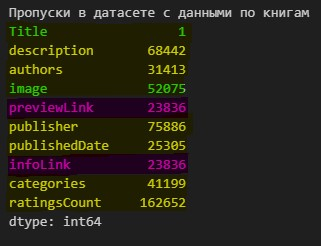

  <div style="line-height: 1.8;">
    <span style="color: #6cb44f;">Удалим строки с пропусками в важных колонках - Title и image.</span><br>
    <span style="color: #e9269a;">Удалим полностью ненужные колонки - previewLink и infoLink.</span><br>
    <span style="color: #c2c550;">Заполним пропуски в колонках - description, publisher, publishedDate, categories и authors пустыми строками ' ' </span><br>
    <span style="color: #c2c550;">Заполним пропуски в колонке -  ratingsCount медианным значением  </span>
  </div>

  ---

In [ ]:
books_info = books_info.dropna(subset=['Title', 'image'])

books_info = books_info.drop(['previewLink','infoLink'], axis=1)

books_info['authors'] = books_info['authors'].fillna('')
books_info['description'] = books_info['description'].fillna('')
books_info['publisher'] = books_info['publisher'].fillna('')
books_info['publishedDate'] = books_info['publishedDate'].fillna('')
books_info['categories'] = books_info['categories'].fillna('')

books_info['ratingsCount'] = books_info['ratingsCount'].fillna(books_info['ratingsCount'].median())

In [ ]:
print("\nПропуски в датасете с данными по книгам")
print(books_info.isna().sum())


Пропуски в датасете с данными по книгам
Title            0
description      0
authors          0
image            0
publisher        0
publishedDate    0
categories       0
ratingsCount     0
dtype: int64


## Объеденим датасеты

Мёрджим по Title

In [ ]:
merged_df = pd.merge(books_ratings, books_info, on='Title', how='inner')

In [ ]:
merged_df.to_csv("/content/drive/MyDrive/Book_recsys/new_data/merged_data.csv")

In [ ]:
merged_df=pd.read_csv("/content/drive/MyDrive/Book_recsys/new_data/merged_data.csv")

# Анализ тональности текста (сентимент-анализ)

In [5]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import re

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model_path = '/content/drive/MyDrive/Sentiment_analysis/sentiment_model.pth'

class SentimentModel(nn.Module):
    def __init__(self, input_size, hidden_size=32,dropout_rate=0.4):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, hidden_size*2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size*2, hidden_size*4),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size*4, hidden_size*8),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size*8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.sequential(x)


sentiment_model=torch.load(model_path)
sentiment_model.to(device)

<ipython-input-25-1d2ceaaea5df>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sentiment_model=torch.load(model_path)


SentimentModel(
  (sequential): Sequential(
    (0): Linear(in_features=12000, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=128, out_features=256, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=256, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [ ]:
!pip install torch==2.2.2 torchtext==0.17.2

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
merged_df['review/text']

dtype('O')

In [ ]:
from torchtext.data.utils import get_tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

class SentimentAnalysisDataset(torch.utils.data.Dataset):
    def __init__(self, texts, vectorizer, sentiment_model, device):
        """
        A dataset for sentiment analysis.

        Args:
            texts (list): List of text reviews.
            vectorizer: The vectorizer used during training.
            sentiment_model: The trained sentiment analysis model.
            device: The device (CPU/GPU) to which the tensor should be sent.
        """
        self.texts = texts
        self.vectorizer = vectorizer
        self.sentiment_model = sentiment_model
        self.device = device

    def __len__(self):
        """
        Returns the total number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        """
        return len(self.texts)

    def __getitem__(self, idx):
        """
        Retrieves and processes a single sample from the dataset.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            torch.Tensor: The sentiment score for the input text.
        """
        text = self.texts[idx]


        if not isinstance(text, str) or pd.isnull(text):
            text = ""
        text = text.lower()
        text = re.sub(r'<br\s*/*\s*><br\s*/*\s*>', '', text)
        text = re.sub(r"[^a-zA-Z0-9]", " ", text)
        tokenizer = get_tokenizer("basic_english")
        tokens = tokenizer(text)
        tokens = [word for word in tokens if word.isalpha()]
        stop_words = set(stopwords.words("english")) - {'not'}
        tokens = [word for word in tokens if word not in stop_words]

        # Use the same vectorizer used during training
        vectorized_text = self.vectorizer.transform([" ".join(tokens)])
        tensor = torch.tensor(vectorized_text.toarray(), dtype=torch.float32)
        tensor = tensor.to(self.device)

        with torch.inference_mode():
            score = self.sentiment_model(tensor)
        return score


vectorizer = joblib.load('/content/drive/MyDrive/Sentiment_analysis/vectorizer.pkl')


batch_size = 10000

dataset = SentimentAnalysisDataset(merged_df["review/text"], vectorizer, sentiment_model, device)
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

if 'sentiment_score' not in merged_df.columns:
    merged_df['sentiment_score'] = None


for i, scores in tqdm(enumerate(loader), total=len(loader), desc="Processing Reviews"):
    start = i * batch_size
    for j, score in enumerate(scores):
        score = score.item()
        merged_df.at[start+j, 'sentiment_score'] = score

Processing Reviews:   0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
merged_df['sentiment_label'] = (merged_df['sentiment_score'] >= 0.5).astype(int)

merged_df.to_csv('merged_dataframe.csv', index=False)


In [6]:
merged_df= pd.read_csv("/content/drive/MyDrive/Book_recsys/new_data/merged_dataframe.csv", keep_default_na=False)

In [ ]:
merged_df[['review/text','sentiment_label']]

,review/text,sentiment_label
0,This is only for Julie Strain fans. It's a col...,0
1,I don't care much for Dr. Seuss but after read...,1
2,"If people become the books they read and if ""t...",1
3,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",0
4,Philip Nel - Dr. Seuss: American IconThis is b...,1
...,...,...
1997434,Highly Recommended.This book is one of the bes...,1
1997435,History is not a scientific process of cutting...,1
1997436,This is pretty interesting. Collingwood seems ...,0
1997437,"This is a good book but very esoteric. ""What i...",1


# Колборативная фильтрация

In [ ]:
user_ids = merged_df['User_id'].unique()
item_ids = merged_df['Title'].unique()
user_to_index = {user_id: idx for idx, user_id in enumerate(user_ids)}
item_to_index = {item_id: idx for idx, item_id in enumerate(item_ids)}
index_to_title = {idx: title for title, idx in item_to_index.items()}

In [ ]:
len(user_ids), len(item_ids)

(876268, 156144)

In [ ]:
pd.DataFrame({
    "user_id":[user_to_index[user_id] for user_id in merged_df['User_id']],
    "item_id":[item_to_index[item_id] for item_id in merged_df['Title']],
    "rating":merged_df['review/score']
})

,user_id,item_id,rating
0,0,0,4.0
1,1,1,5.0
2,2,1,5.0
3,3,1,4.0
4,4,1,4.0
...,...,...,...
1997434,183964,156143,5.0
1997435,53015,156143,4.0
1997436,21128,156143,4.0
1997437,876266,156143,4.0


In [ ]:
user_indices = torch.tensor([user_to_index[user_id] for user_id in merged_df['User_id']], dtype=torch.long)
item_indices = torch.tensor([item_to_index[item_id] for item_id in merged_df['Title']], dtype=torch.long)
ratings = torch.tensor(merged_df['review/score'].values, dtype=torch.float32)

In [ ]:
dataset = TensorDataset(user_indices, item_indices, ratings)

In [ ]:
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [ ]:
next(iter(dataloader))

[tensor([729826, 288746, 527581, 838979, 637080, 805793, 585202,   9474, 576169,
          31809, 157044,  61583,  64395,    174, 120442, 174901, 718492,  73216,
         714343, 115855, 489187,  93184, 203890, 279627,  34552, 232705,  56096,
         180693,  27857,  88108, 181454,  44131,  57477, 152158, 306816, 618170,
         246718, 840884,  59261,   7248,  41940,  97981, 392105,  25715,  92804,
          28002, 498634,  32284, 162929, 684481,  12475,  52576,   3055, 352990,
         434229, 238550, 102314,  14692, 361690, 769606,  63154, 180825, 595421,
         628577]),
 tensor([123020,  35633,  78158, 147431, 100697, 140170,  90147,    966,  88164,
          95908,  17294,   5580, 124298, 150847, 155847, 136695, 134353,  60848,
         119120,  11955, 102348,   9087,  23804,  84121, 119418, 147235,  22417,
         144944,   2790, 122971,  80425,  45382,  58824,  56298,  38528, 111505,
          56567, 147803,   5259, 109064,  23167, 144257,  52855,   2584,  83510,
         

In [ ]:
class CollaborativeFilteringModel(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim, hidden_dim):
        super().__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)
        self.hidden_layer = nn.Linear(embedding_dim * 2, hidden_dim)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim, 1)

    def forward(self, user_indices, item_indices):
        user_embedded = self.user_embedding(user_indices)
        item_embedded = self.item_embedding(item_indices)
        concatenated = torch.cat([user_embedded, item_embedded], dim=1)
        hidden_output = self.relu(self.hidden_layer(concatenated))
        output = self.output_layer(hidden_output)
        return output

    def get_similar_titles(self, input_title_index, top_k=100):
        device = self.item_embedding.weight.device


        input_title_index = torch.tensor([input_title_index], device=device)


        input_title_embedding = self.item_embedding(input_title_index)


        all_title_embeddings = self.item_embedding.weight


        similarities = F.cosine_similarity(input_title_embedding, all_title_embeddings)


        similar_title_indices = torch.argsort(similarities, descending=True)[:top_k]


        similar_titles = [index_to_title[idx.item()] for idx in similar_title_indices]

        return similar_titles

In [ ]:
model.eval()

CollaborativeFilteringModel(
  (user_embedding): Embedding(876268, 100)
  (item_embedding): Embedding(156144, 100)
  (hidden_layer): Linear(in_features=200, out_features=32, bias=True)
  (relu): ReLU()
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
num_users = len(user_ids)
num_items = len(item_ids)
embedding_dim = 100
model = CollaborativeFilteringModel(num_users, num_items, embedding_dim,32)

In [ ]:
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 8
for epoch in tqdm(range(epochs),desc="Training Collaborative Model"):
    model.train()
    total_loss = 0.0
    for user_batch, item_batch, rating_batch in tqdm(dataloader, desc=f"Epoch {epoch + 1}/{epochs}"):
        user_batch, item_batch, rating_batch = user_batch.to(device), item_batch.to(device), rating_batch.to(device)
        optimizer.zero_grad()
        predictions = model(user_batch, item_batch).squeeze()
        loss = criterion(predictions, rating_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    average_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {average_loss:.4f}')

Training Collaborative Model:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/8:   0%|          | 0/31210 [00:00<?, ?it/s]

Epoch 1/8, Average Loss: 1.3865


Epoch 2/8:   0%|          | 0/31210 [00:00<?, ?it/s]

Epoch 2/8, Average Loss: 1.0628


Epoch 3/8:   0%|          | 0/31210 [00:00<?, ?it/s]

Epoch 3/8, Average Loss: 0.8352


Epoch 4/8:   0%|          | 0/31210 [00:00<?, ?it/s]

Epoch 4/8, Average Loss: 0.6444


Epoch 5/8:   0%|          | 0/31210 [00:00<?, ?it/s]

Epoch 5/8, Average Loss: 0.4947


Epoch 6/8:   0%|          | 0/31210 [00:00<?, ?it/s]

Epoch 6/8, Average Loss: 0.3837


Epoch 7/8:   0%|          | 0/31210 [00:00<?, ?it/s]

Epoch 7/8, Average Loss: 0.3045


Epoch 8/8:   0%|          | 0/31210 [00:00<?, ?it/s]

Epoch 8/8, Average Loss: 0.2489


In [ ]:
user_index = torch.tensor([3], dtype=torch.long).to(device)
item_index = torch.tensor([8], dtype=torch.long).to(device)
prediction = model(user_index, item_index).item()
print(f'Predicted Rating: {prediction:.4f}')

Predicted Rating: 4.1929


In [ ]:
model.eval()
total_mse = 0.0

with torch.inference_mode():
    for user_batch, item_batch, rating_batch in tqdm(dataloader,desc="evaluating..."):
        user_batch, item_batch, rating_batch = user_batch.to(device), item_batch.to(device), rating_batch.to(device)
        predictions = model(user_batch, item_batch).squeeze()
        mse = nn.functional.mse_loss(predictions, rating_batch)
        total_mse += mse.item()

average_mse = total_mse / len(dataloader)
rmse = average_mse ** 0.5

print(f'Mean Squared Error: {average_mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

evaluating...:   0%|          | 0/31210 [00:00<?, ?it/s]

Mean Squared Error: 0.1932
Root Mean Squared Error: 0.4395


In [ ]:
model_path = 'collaborative_filtering_model8.pth'
torch.save(model, model_path)
print(f'Model saved to {model_path}')

Model saved to collaborative_filtering_model8.pth


In [ ]:
model_path="/content/drive/MyDrive/Book_recsys/models/collaborative_filtering_model.pth"
collaborative_filtering_model = torch.load(model_path, map_location=device)
collaborative_filtering_model.to(device)

<ipython-input-19-623877eeda4b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  collaborative_filtering_model = torch.load(model_path, map_location=device)


CollaborativeFilteringModel(
  (user_embedding): Embedding(876268, 100)
  (item_embedding): Embedding(156144, 100)
  (hidden_layer): Linear(in_features=200, out_features=32, bias=True)
  (relu): ReLU()
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
user_index = torch.tensor([user_to_index['A30TK6U7DNS82R']], dtype=torch.long)
item_index = torch.tensor([item_to_index['Dr. Seuss: American Icon']], dtype=torch.long)
user_index , item_index= user_index.to(device), item_index.to(device)
prediction = model(user_index, item_index).item()
print(f'Predicted Rating: {prediction:.4f}')

Predicted Rating: 4.2603


# Контентная фильтрация

In [7]:
title_sentiment_aggregated = merged_df.groupby(['Title','authors','categories'])['sentiment_score'].mean().reset_index()

In [8]:
title_sentiment_aggregated.to_csv('title_sentiment_aggregated.csv')

In [ ]:
title_sentiment_aggregated

,Title,authors,categories,sentiment_score
0,""" Film technique, "" and, "" Film acting """,['V. I. Pudovkin'],['Drama'],0.739543
1,""" We'll Always Have Paris"": The Definitive Gui...","['Robert A. Nowlan', 'Gwendolyn Wright Nowlan']",['Reference'],0.656249
2,"""A Titanic hero"" Thomas Andrews, shipbuilder",['Shan F. Bullock'],,0.908762
3,"""A Truthful Impression of the Country"": Britis...","['Nicholas J. Clifford', 'Nicholas Rowland Cli...",['History'],0.099376
4,"""A careless word, a needless sinking"": A histo...",['Arthur R. Moore'],['Merchant marine'],0.534533


In [ ]:
unique_categories = merged_df['categories'].unique()
unique_authors = merged_df['authors'].unique()
unique_titles = title_sentiment_aggregated['Title'].unique()

category_to_index = {category: idx for idx, category in enumerate(unique_categories)}
author_to_index = {author: idx for idx, author in enumerate(unique_authors)}
title_to_index = {title: idx for idx, title in enumerate(unique_titles)}

In [ ]:
category_indices = torch.tensor([category_to_index[category] for category in title_sentiment_aggregated['categories']], dtype=torch.long)
author_indices = torch.tensor([author_to_index[author] for author in title_sentiment_aggregated['authors']], dtype=torch.long)
title_indices = torch.tensor([title_to_index[title] for title in title_sentiment_aggregated['Title']], dtype=torch.long)

In [ ]:
sentiment_scores = torch.tensor(title_sentiment_aggregated['sentiment_score'].values, dtype=torch.float32)

target_variable = torch.tensor(merged_df.groupby('Title')['sentiment_label'].mean().values, dtype=torch.float32)

In [ ]:
cbf_dataset = TensorDataset(category_indices, author_indices, title_indices, sentiment_scores, target_variable)
cbf_dataloader = DataLoader(cbf_dataset, batch_size=64, shuffle=True)

In [ ]:
class ContentBasedFilteringModel(nn.Module):
    def __init__(self, num_categories, num_authors, num_titles, embedding_dim):
        super(ContentBasedFilteringModel, self).__init__()
        self.category_embedding = nn.Embedding(num_categories, embedding_dim)
        self.author_embedding = nn.Embedding(num_authors, embedding_dim)
        self.title_embedding = nn.Embedding(num_titles, embedding_dim)
        self.sentiment_linear = nn.Linear(4 * embedding_dim, 1)

    def forward(self, category_indices, author_indices, title_indices, sentiment_scores):
        category_embedded = self.category_embedding(category_indices)
        author_embedded = self.author_embedding(author_indices)
        title_embedded = self.title_embedding(title_indices)
        sentiment_expanded = sentiment_scores.unsqueeze(1).expand_as(category_embedded)



        concatenated = torch.cat([category_embedded, author_embedded, title_embedded, sentiment_expanded], dim=1)
        output = self.sentiment_linear(concatenated)
        return output



In [ ]:
# Instantiate the model
num_categories = len(unique_categories)
num_authors = len(unique_authors)
num_titles = len(unique_titles)
embedding_dim = 64
cbf_model = ContentBasedFilteringModel(num_categories, num_authors, num_titles, embedding_dim)
cbf_model.to(device)

ContentBasedFilteringModel(
  (category_embedding): Embedding(7424, 64)
  (author_embedding): Embedding(107386, 64)
  (title_embedding): Embedding(156144, 64)
  (sentiment_linear): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
# Define loss function and optimizer
criterion_cbf = nn.BCEWithLogitsLoss()
optimizer_cbf = optim.Adam(cbf_model.parameters(), lr=0.001)

In [ ]:
# Training loop
epochs_cbf = 4 #total used around 3 epochs...

for epoch in tqdm(range(epochs_cbf),desc='Training Content based filtering model'):
    cbf_model.train()
    total_loss_cbf = 0.0

    for category_batch, author_batch, title_batch, sentiment_batch, target_batch in tqdm(cbf_dataloader):
        category_batch, author_batch, title_batch, sentiment_batch, target_batch = category_batch.to(device), author_batch.to(device), title_batch.to(device), sentiment_batch.to(device), target_batch.to(device)
        optimizer_cbf.zero_grad()
        predictions_cbf = cbf_model(
            category_batch, author_batch, title_batch, sentiment_batch
        ).squeeze()
        loss_cbf = criterion_cbf(
            predictions_cbf, target_batch
        )
        loss_cbf.backward()
        optimizer_cbf.step()
        total_loss_cbf += loss_cbf.item()

    average_loss = total_loss_cbf / len(cbf_dataloader)
    print(f'Epoch {epoch + 1}/{epochs_cbf}, Average Loss: {average_loss:.4f}')

Training Content based filtering model:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2440 [00:00<?, ?it/s]

Epoch 1/4, Average Loss: 0.4044


  0%|          | 0/2440 [00:00<?, ?it/s]

Epoch 2/4, Average Loss: 0.3598


  0%|          | 0/2440 [00:00<?, ?it/s]

Epoch 3/4, Average Loss: 0.3455


  0%|          | 0/2440 [00:00<?, ?it/s]

Epoch 4/4, Average Loss: 0.3350


In [ ]:
# Evaluation loop
cbf_model.eval()
total_loss_cbf = 0.0

with torch.inference_mode():
    for category_batch, author_batch, title_batch, sentiment_batch, target_batch in cbf_dataloader:
        category_batch, author_batch, title_batch, sentiment_batch, target_batch = category_batch.to(device), author_batch.to(device), title_batch.to(device), sentiment_batch.to(device), target_batch.to(device)
        predictions_cbf = cbf_model(
            category_batch, author_batch, title_batch, sentiment_batch
        ).squeeze()
        loss_cbf = criterion_cbf(
            predictions_cbf, target_batch
        )
        total_loss_cbf += loss_cbf.item()

    average_loss = total_loss_cbf / len(cbf_dataloader)
    print(f'Evaluation Loss: {average_loss:.4f}')

Evaluation Loss: 0.3258


In [ ]:
category_index = torch.tensor([0], dtype=torch.long)
author_index = torch.tensor([0], dtype=torch.long)
sentiment_index = torch.tensor([0], dtype=torch.long)
title_index = torch.tensor([1], dtype=torch.long)
category_index, author_index, title_index, sentiment_index= category_index.to(device), author_index.to(device), title_index.to(device), sentiment_index.to(device)
prediction = cbf_model(category_index, author_index,sentiment_index,title_index).item()
print(f'Predicted Sentiment: {prediction:.4f}')

Predicted Sentiment: 4.6083


In [ ]:
model_path = 'content_based_filtering_model4.pth'
torch.save(cbf_model, model_path)
print(f'Model saved to {model_path}')

Model saved to content_based_filtering_model4.pth


In [ ]:
model_path="/content/drive/MyDrive/Book_recsys/models/content_based_filtering_model.pth"
cbf_model = torch.load(model_path, map_location=device)
cbf_model.to(device)

<ipython-input-79-091b23079f47>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cbf_model = torch.load(model_path, map_location=device)


ContentBasedFilteringModel(
  (category_embedding): Embedding(7424, 64)
  (author_embedding): Embedding(107386, 64)
  (title_embedding): Embedding(156144, 64)
  (sentiment_linear): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
def get_collaborative_recommendations(model, title, num_recommendations=100):
    input_title_index = item_to_index[title]


    model.eval()
    with torch.inference_mode():

        similar_titles = model.get_similar_titles(input_title_index, top_k=num_recommendations)


    return similar_titles

In [ ]:
input_title = "The Universe and Dr. Einstein"
collab_recommendations = get_collaborative_recommendations(model, input_title,num_recommendations=1000)

In [ ]:
collab_recommendations[:10]

['The Universe and Dr. Einstein',
 'How Much Is Enough? Harness the Power of Your Money Story--And Change Your Life',
 'PATHWAYS OF THE PULP E DITION',
 'The Betrothal: The Claiming Of Lady Joanna\\Highland Handfast\\A Marriage In Three Acts (Harlequin Historical)',
 'THE MYSTERIOUS TOYSHOP',
 'Situations Of Life: Floetry... For Poetry Lovers',
 "Whistling Death: The Test Pilot's Story of the F4U Corsair",
 'An Anthology of Irish Literature (Modern Library, 288.1)',
 'Perfect love: Or, plain things for those who need them, concerning the doctrine, experience, profession, and practice of Christian holiness',
 'Mammoth Book of Dinosaurs']

In [ ]:
def get_content_based_recommendations(content_based_model, collaborative_recommendations):

    title_details = title_sentiment_aggregated.set_index('Title')[['categories', 'authors', 'sentiment_score']].to_dict(orient='index')

    details = [title_details[title] for title in collaborative_recommendations]


    category_indices = torch.tensor([category_to_index[detail['categories']] for detail in details], dtype=torch.long)
    author_indices = torch.tensor([author_to_index[detail['authors']] for detail in details], dtype=torch.long)
    title_indices = torch.tensor([title_to_index[title] for title in collaborative_recommendations], dtype=torch.long)
    sentiment_scores = torch.tensor([detail['sentiment_score'] for detail in details], dtype=torch.float32)
    category_indices, author_indices, title_indices, sentiment_scores= category_indices.to(device), author_indices.to(device), title_indices.to(device), sentiment_scores.to(device)

    content_based_model.eval()
    with torch.inference_mode():
        predictions = content_based_model(category_indices, author_indices, title_indices, sentiment_scores)


    sorted_titles = [title for _, title in sorted(zip(predictions, collaborative_recommendations), reverse=True)]


    return sorted_titles